# Generating coeval boxes and lightcones

The majority of the functions for generating these two objects are the same, with the exception of the lightcone class having the extra attribute Lightconer (the lightconer object from 21cmFAST, required for plotting of the lightcone) and the plot_lightcone function; and the lightcone having a central redshift and redshift range, as opposed to the single input redshift for the box.  
Here, we demonstrate with a lightcone.

In [1]:
from postEoR import generation as gen

We can specify the desired redshift (+ redshift range for the cone), the physical dimensions and number of cells, and the overdensity limit for inclusion of cells in halos.

In [2]:
central_redshift = 4
redshift_range = 0.4
no_of_cells = 200
phys_length = 400
overdens_cap = 0

In [3]:
cone = gen.generate_cone(
    z_centr=central_redshift, 
    delta_z=redshift_range, 
    HII_dim=no_of_cells, 
    box_len=phys_length, 
    overdens_cap=overdens_cap
)

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


We can plot colormaps, power spectra, halo mass functions etc. from the object itself.

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


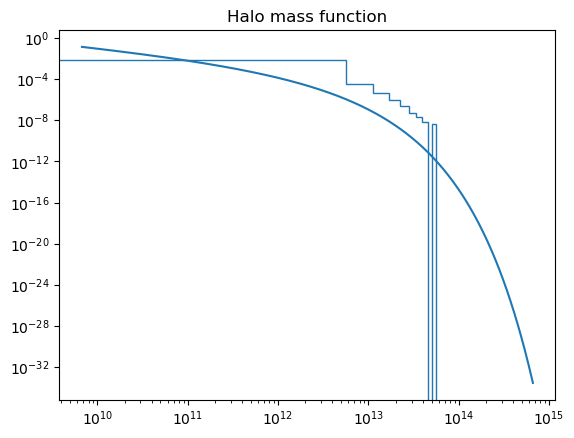

In [4]:
bins, counts, los_dist = cone.gen_hmf(set_bins=False)

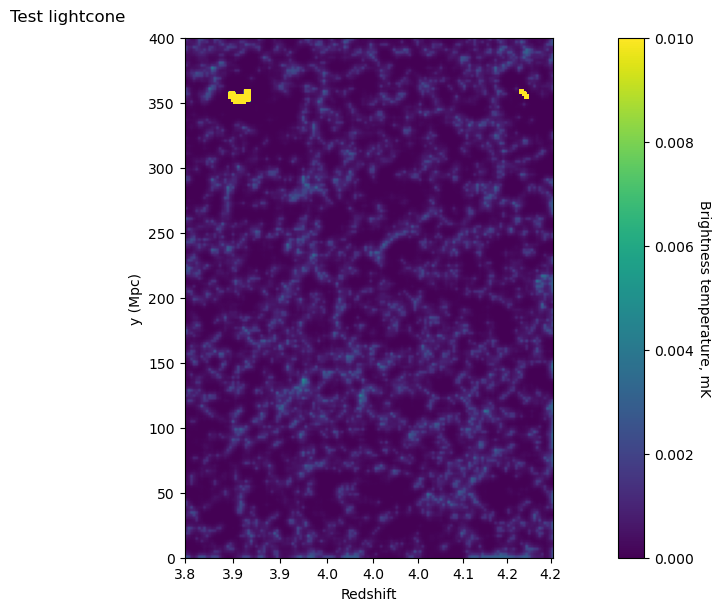

In [8]:
cone.plot_lightcone(save_loc="test_lightcone.png", title="Test lightcone", vmax=0.01)

<Figure size 1300x600 with 0 Axes>

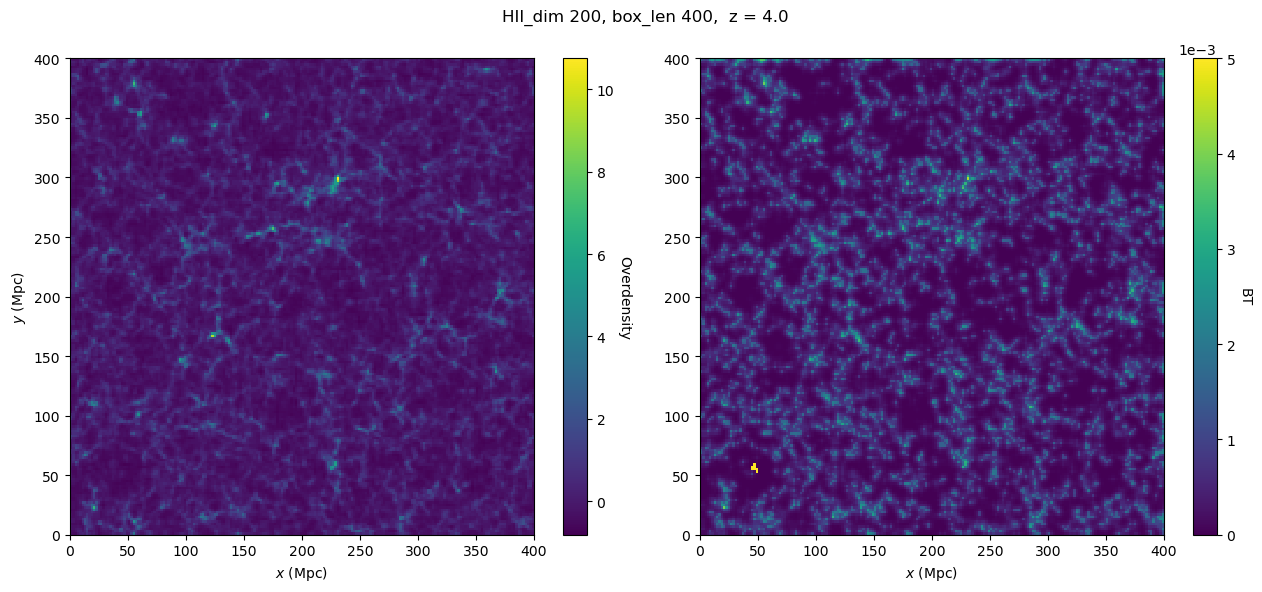

In [5]:
cone.plot_slice(field="BT", vmax=0.005)

# Power spectra and bias

We can also calculate and plot the power spectra 

Generated bins.
Generated bins.
Using input bins
Using input bins


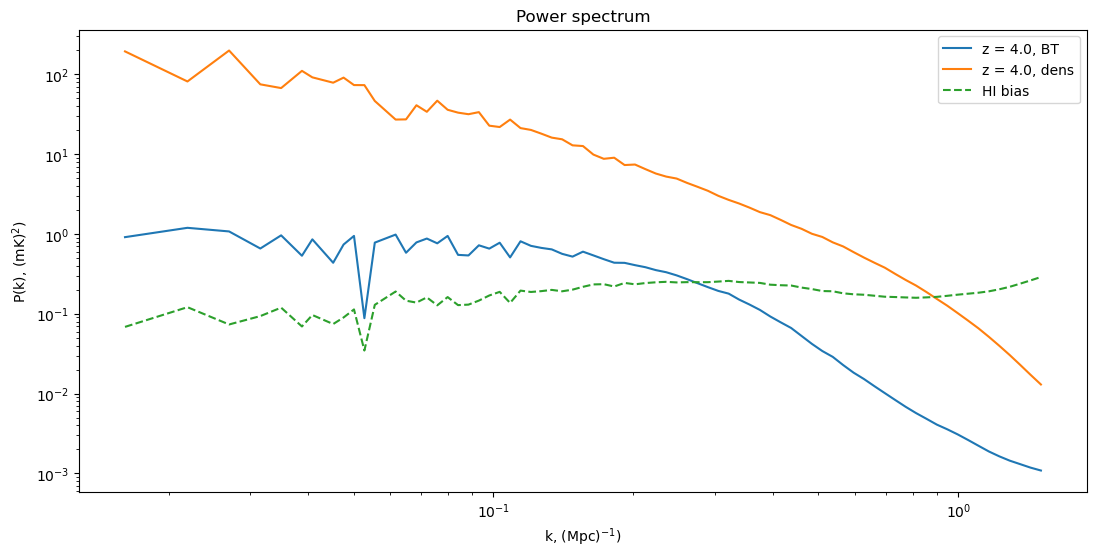

In [7]:
import matplotlib.pyplot as plt
k, ps, err = cone.get_PS("BT", color="tab:blue")
k1, ps1, err1 = cone.get_PS("dens", color="tab:orange")
k2, bias = cone.get_bias()
plt.plot(k2, bias, color="tab:green", linestyle="--", label="HI bias")
plt.legend()

# Alternative halo finder

The default halo finder is an iterative for/if loop that pushes overdensities to their local maxima, defined as the halo centre.  
However, there is also the option of using a watershed-based halo finder. This takes significantly more time to compute, but may result in more accurate halos.

In [2]:
box = gen.generate_box(4, 250, 50, use_watershed=True)

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


removed underdense
distance transformed
[[[    9     9     9 ...  3592  3592  3592]
  [    9     9     9 ...  3592  3592  3592]
  [    9     9     9 ...  3592  3592  3592]
  ...
  [ 1720  1720  1720 ...   927   927   927]
  [ 1720  1720  1720 ...   927   927   927]
  [ 1720  1720  1720 ...   927   927   927]]

 [[   12    12    12 ...  3592  3592  3592]
  [   12    12    12 ...  3592  3592  3592]
  [   12    12    12 ...  3592  3592  3592]
  ...
  [ 1720  1720  1720 ...   927   927   927]
  [ 1720  1720  1720 ...   927   927   927]
  [ 1720  1720  1720 ...   927   927   927]]

 [[   12    12    12 ...  3592  3592  3592]
  [   12    12    12 ...  3592  3592  3592]
  [   12    12    12 ...  3592  3592  3592]
  ...
  [ 1720  1720  1720 ...   927   927   927]
  [ 1720  1720  1720 ...   927   927   927]
  [ 1720  1720  1720 ...   927   927   927]]

 ...

 [[55067 55067 55067 ... 54870 54711 54711]
  [55067 55067 55067 ... 54870 54711 54711]
  [55067 55067 55067 ... 54870 54711 54711]
  ...


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


(array([1.00000000e+10, 2.15443469e+10, 4.64158883e+10, 1.00000000e+11,
        2.15443469e+11, 4.64158883e+11, 1.00000000e+12, 2.15443469e+12,
        4.64158883e+12, 1.00000000e+13]),
 array([7780, 8306, 5438, 2035,  509,  105,   11,    2,    0]),
 50)

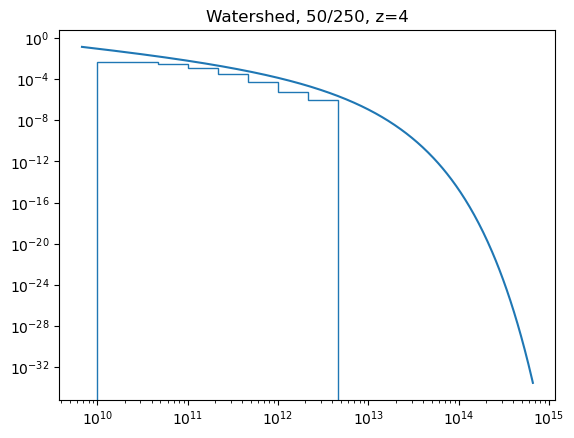

In [4]:
box.gen_hmf(title="Watershed, 50/250, z=4")

Generated bins.
Generated bins.
Using input bins
Using input bins


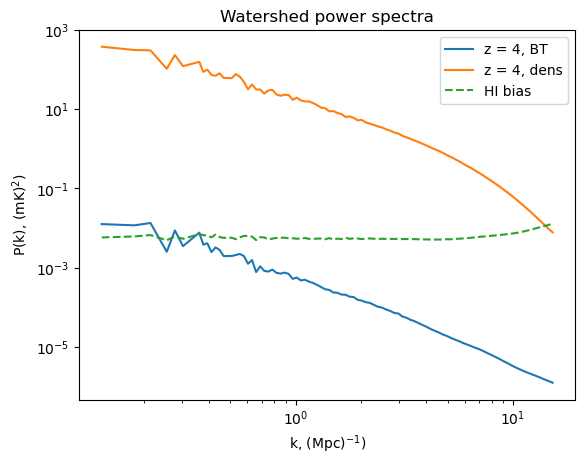

In [8]:
box.get_PS("BT", color="tab:blue")
box.get_PS("dens", color="tab:orange", title="Watershed power spectra")
k, bias = box.get_bias()
import matplotlib.pyplot as plt
plt.plot(k, bias, color="tab:green", linestyle="--", label="HI bias")
plt.legend()

<Figure size 1300x600 with 0 Axes>

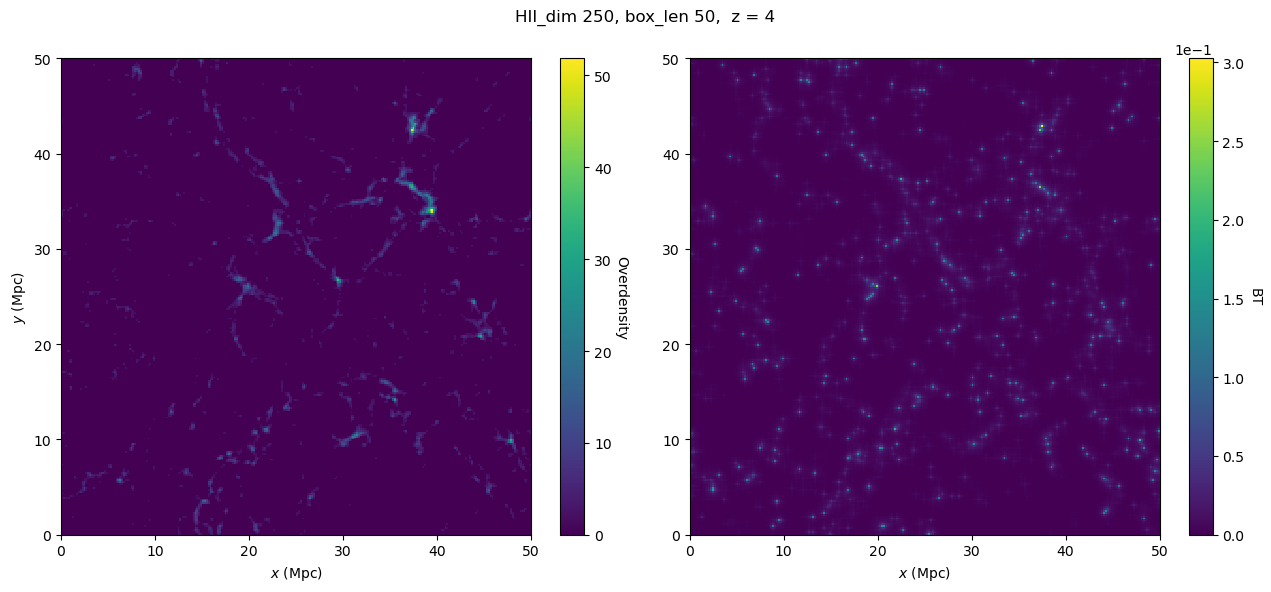

In [12]:
box.plot_slice(field="BT")